<a href="https://colab.research.google.com/github/resigridgh/resigrid01/blob/main/CPE_586_Final_Project_IslamMdSaiful.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis

Dataset Shape: (201604, 5)

First 10 rows:
          utc_timestamp        cet_cest_timestamp  load_demand  \
0  2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100          NaN   
1  2014-12-31T23:15:00Z  2015-01-01T00:15:00+0100          NaN   
2  2014-12-31T23:30:00Z  2015-01-01T00:30:00+0100          NaN   
3  2014-12-31T23:45:00Z  2015-01-01T00:45:00+0100          NaN   
4  2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100          NaN   
5  2015-01-01T00:15:00Z  2015-01-01T01:15:00+0100     41517.72   
6  2015-01-01T00:30:00Z  2015-01-01T01:30:00+0100     41179.17   
7  2015-01-01T00:45:00Z  2015-01-01T01:45:00+0100     40756.40   
8  2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100     40617.76   
9  2015-01-01T01:15:00Z  2015-01-01T02:15:00+0100     40312.25   

   solar_generation  wind_generation  
0               NaN              NaN  
1               NaN              NaN  
2               NaN              NaN  
3               NaN              NaN  
4               NaN              Na

/tmp/ipython-input-111838440.py:75: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  _ = pd.to_datetime(df[col])


Found datetime column: cet_cest_timestamp

Numeric columns: ['load_demand', 'solar_generation', 'wind_generation']
Datetime columns: ['utc_timestamp', 'cet_cest_timestamp']
Set index to datetime column: utc_timestamp

Final numeric columns for analysis: ['load_demand', 'solar_generation', 'wind_generation']

NaN DIAGNOSIS

NaN counts per column:
 cet_cest_timestamp      0
load_demand             6
solar_generation      420
wind_generation       304
dtype: int64

NaN percent per column:
 cet_cest_timestamp    0.00
load_demand           0.00
solar_generation      0.21
wind_generation       0.15
dtype: float64

Rows with ANY NaN: 430/201604 (0.21%)
Rows with ALL NaN: 0/201604 (0.0%)


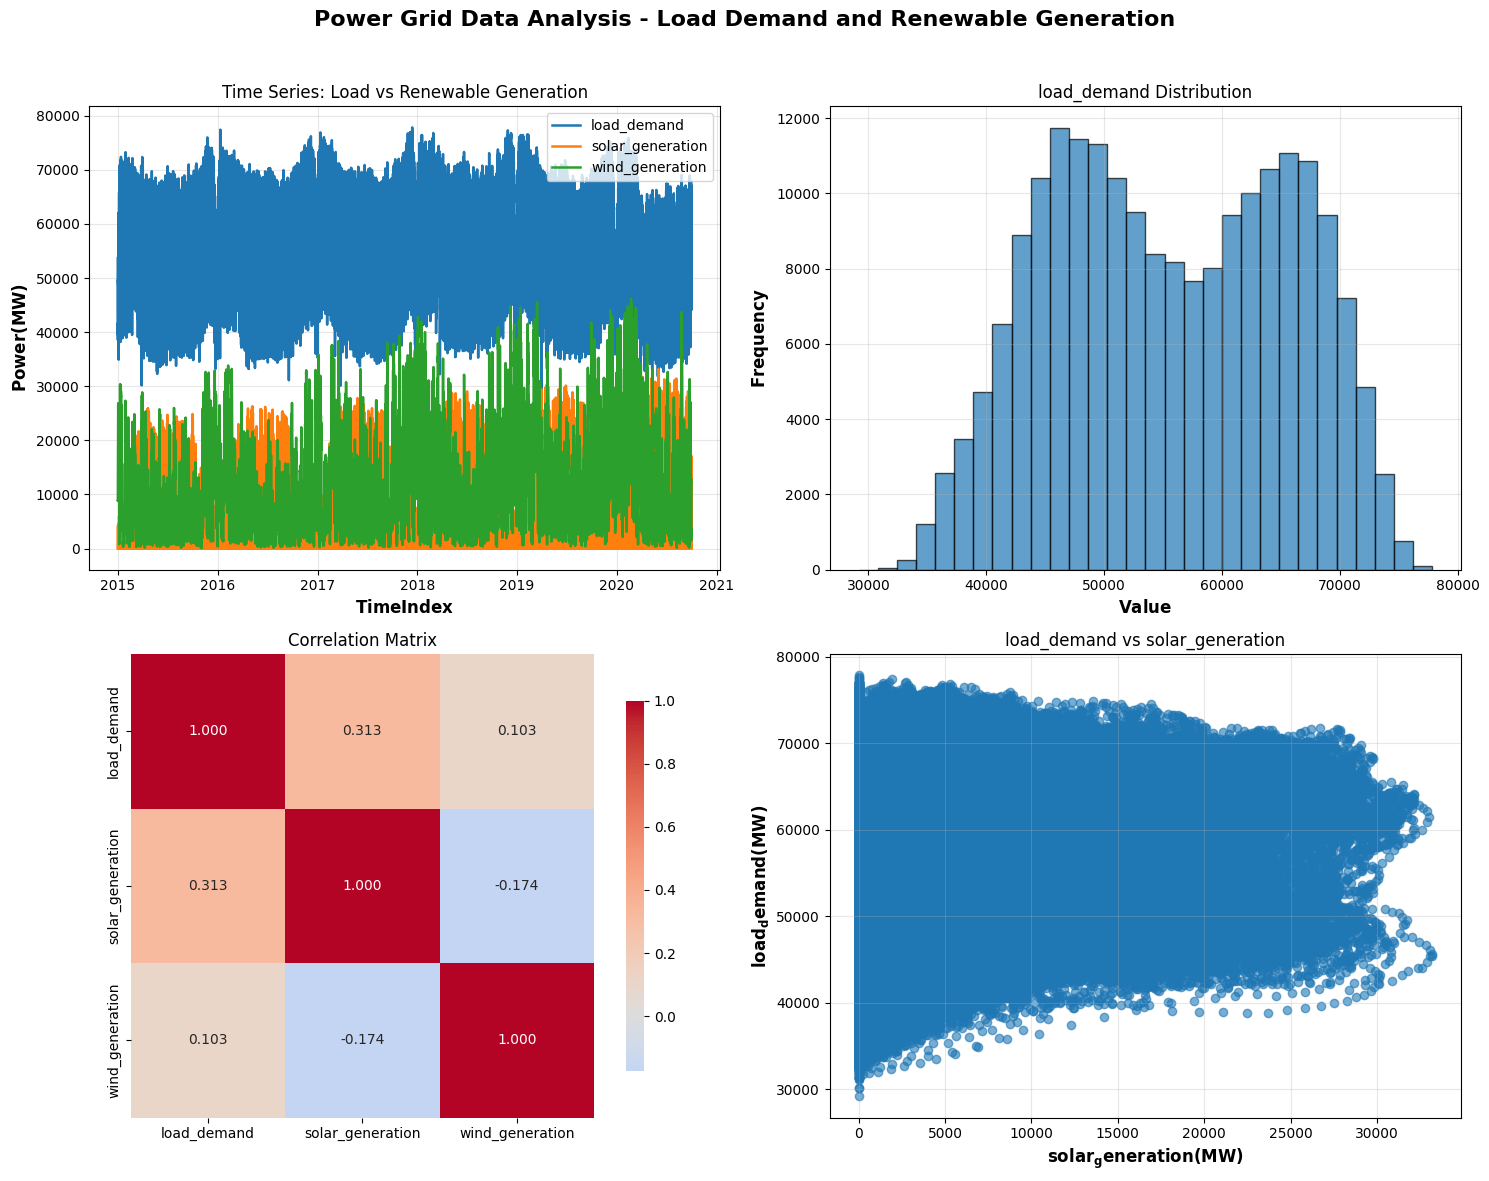

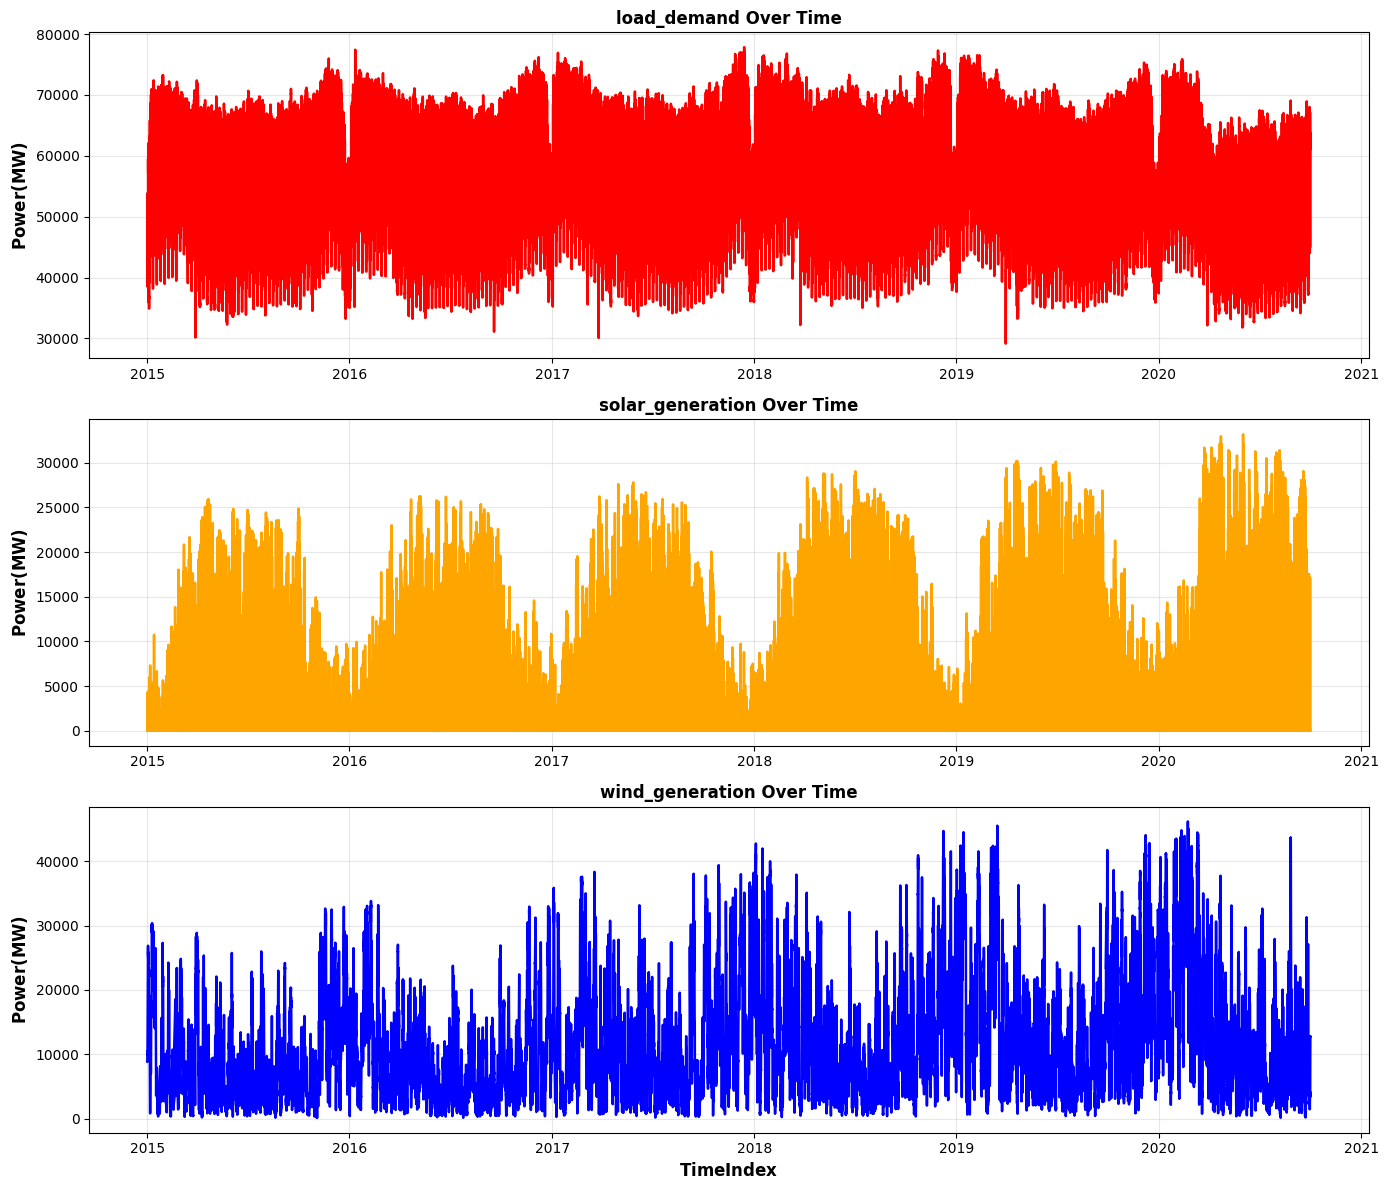

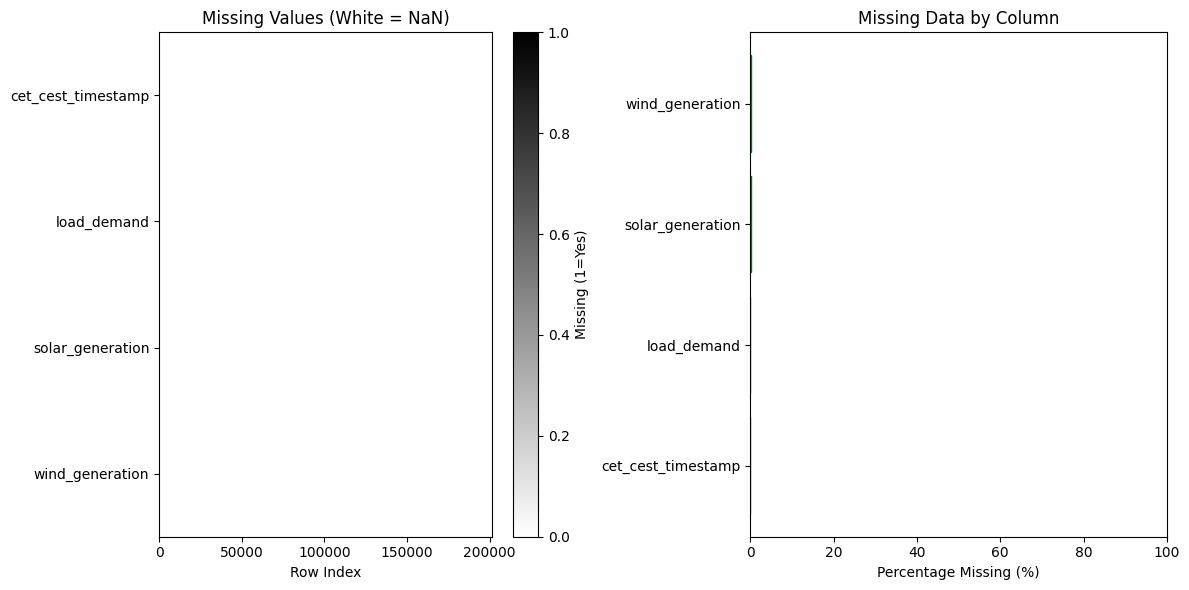


Missing data by hour of day (percent):

load_demand:
utc_timestamp
0     0.01
1     0.00
2     0.00
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
14    0.00
15    0.00
16    0.00
17    0.00
18    0.00
19    0.00
20    0.00
21    0.00
22    0.00
23    0.06
Name: load_demand, dtype: float64

solar_generation:
utc_timestamp
0     0.24
1     0.24
2     0.24
3     0.24
4     0.24
5     0.24
6     0.24
7     0.20
8     0.19
9     0.19
10    0.19
11    0.19
12    0.19
13    0.19
14    0.19
15    0.19
16    0.19
17    0.19
18    0.19
19    0.19
20    0.19
21    0.19
22    0.19
23    0.27
Name: solar_generation, dtype: float64

wind_generation:
utc_timestamp
0     0.15
1     0.14
2     0.14
3     0.14
4     0.14
5     0.14
6     0.14
7     0.14
8     0.14
9     0.14
10    0.14
11    0.14
12    0.14
13    0.15
14    0.19
15    0.19
16    0.15
17    0.14
18    0.14
19    0.14
20    0.14
21    0.14
22    0.14
23    0.20
Na

/tmp/ipython-input-111838440.py:282: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  imputed = temp.interpolate(method='time',



FINAL DATASET SHAPE: (201604, 4)
NaN count after imputation: 0
Completeness: 100.00%

Statistical comparison (original vs final) for common numeric columns:

Original data statistics:
          load_demand  solar_generation  wind_generation
count  201598.000000     201184.000000    201300.000000
mean    55492.589700       4566.134215     11552.324213
std     10041.148871       6964.591224      9080.676730
min     29158.120000          0.000000       104.660000
25%     47099.780000          0.000000      4504.955000
50%     55117.400000        106.400000      9009.805000
75%     64337.655000       7377.905000     16126.362500
max     77852.940000      33193.770000     46205.630000

Final data statistics:
          load_demand  solar_generation  wind_generation
count  201604.000000     201604.000000    201604.000000
mean    55492.191657       4556.623945     11554.025690
std     10041.267206       6960.445646      9076.672904
min     29158.120000          0.000000       104.660000
25%  

In [ ]:
# full_pipeline_clean.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# -----------------------
# Global plotting style
# -----------------------
mpl.rcParams.update({
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'text.usetex': False,   # keep False so LaTeX installation is not required
    'font.family': 'serif',
    'figure.titlesize': 16,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
})

# -----------------------
# Helper: MATLAB-like axis styling
# -----------------------
def apply_matlab_style(ax, xlabel='Time', ylabel=None):
    """Apply MATLAB-like axis style with bold labels using mathtext."""
    # Tick appearance
    ax.tick_params(axis='x', colors='black', direction='out')
    ax.tick_params(axis='y', colors='black', direction='out')

    # Bold labels using mathtext \mathbf{} so it doesn't print as plain text
    if xlabel:
        ax.set_xlabel(r'$\mathbf{' + xlabel + '}$', fontsize=12)
    if ylabel is not None:
        ax.set_ylabel(r'$\mathbf{' + ylabel + '}$', fontsize=12)

# -----------------------
# Load dataset
# -----------------------
url = "https://docs.google.com/spreadsheets/d/1YJhQIi8rBEjWekGm06IpahR3XhnrPDLdnNVST6H_rDQ/export?format=csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
print("\nFirst 10 rows:")
print(df.head(10))
print("\nColumn names:")
print(df.columns.tolist())
print("\nDataset Info:")
print(df.info())

# -----------------------
# Inspect dtypes & sample values
# -----------------------
print("\nData types:")
print(df.dtypes)

for col in df.columns:
    print(f"\nColumn '{col}' sample values: {df[col].head(3).values}  dtype: {df[col].dtype}")

# -----------------------
# Identify numeric and datetime columns
# -----------------------
numeric_columns = []
datetime_columns = []

for col in df.columns:
    try:
        _ = pd.to_numeric(df[col])
        numeric_columns.append(col)
    except Exception:
        try:
            _ = pd.to_datetime(df[col])
            datetime_columns.append(col)
            print(f"Found datetime column: {col}")
        except Exception:
            print(f"Non-numeric, non-datetime column: {col} - excluded from numeric analysis")

print(f"\nNumeric columns: {numeric_columns}")
print(f"Datetime columns: {datetime_columns}")

# -----------------------
# Set datetime index if available
# -----------------------
if datetime_columns:
    prefer = ['utc_timestamp', 'cet_cest_timestamp', 'timestamp', 'time', 'date', 'datetime']
    chosen = None
    for p in prefer:
        if p in datetime_columns:
            chosen = p
            break
    if chosen is None:
        chosen = datetime_columns[0]

    try:
        df[chosen] = pd.to_datetime(df[chosen], errors='coerce')
        df = df.set_index(chosen).sort_index()
        print(f"Set index to datetime column: {chosen}")
    except Exception as e:
        print("Failed to set datetime index:", e)
else:
    # try to interpret index as datetime if possible
    try:
        df.index = pd.to_datetime(df.index)
        print("Converted existing index to datetime.")
    except Exception:
        print("No datetime index available; using default integer index.")

# -----------------------
# Numeric-only dataframe
# -----------------------
df_numeric = df[numeric_columns].copy() if numeric_columns else pd.DataFrame()

for col in df_numeric.columns:
    if df_numeric[col].dtype == 'object':
        df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

df_numeric = df_numeric.select_dtypes(include=[np.number]).copy()
print(f"\nFinal numeric columns for analysis: {df_numeric.columns.tolist()}")

# -----------------------
# NaN diagnosis
# -----------------------
print("\n" + "="*60)
print("NaN DIAGNOSIS")
print("="*60)
total_rows = len(df)
nan_counts = df.isna().sum()
nan_pct = (nan_counts / total_rows * 100).round(2)

print("\nNaN counts per column:\n", nan_counts)
print("\nNaN percent per column:\n", nan_pct)
print("\nRows with ANY NaN: {}/{} ({}%)".format(
    df.isna().any(axis=1).sum(),
    total_rows,
    round(df.isna().any(axis=1).sum() / total_rows * 100, 2)
))
print("Rows with ALL NaN: {}/{} ({}%)".format(
    df.isna().all(axis=1).sum(),
    total_rows,
    round(df.isna().all(axis=1).sum() / total_rows * 100, 2)
))

# -----------------------
# 2x2 main plots: time series, distribution, correlation, scatter
# -----------------------
plt.style.use('default')

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Power Grid Data Analysis - Load Demand and Renewable Generation',
             fontsize=16, fontweight='bold')

# (1) Time series of all numeric variables
if not df_numeric.empty:
    for col in df_numeric.columns:
        axes[0, 0].plot(df_numeric.index, df_numeric[col], label=col, linewidth=1.8)
    axes[0, 0].set_title('Time Series: Load vs Renewable Generation')
    apply_matlab_style(axes[0, 0], xlabel='Time Index', ylabel='Power (MW)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'No numeric columns to plot',
                    ha='center', va='center')
    axes[0, 0].set_title('Time Series: Load vs Renewable Generation')

# (2) Distribution of first numeric column
if not df_numeric.empty:
    load_col = df_numeric.columns[0]
    axes[0, 1].hist(df_numeric[load_col].dropna(),
                    bins=30, alpha=0.7, edgecolor='black')
    axes[0, 1].set_title(f'{load_col} Distribution')
    apply_matlab_style(axes[0, 1], xlabel='Value', ylabel='Frequency')
    axes[0, 1].grid(True, alpha=0.3)
else:
    axes[0, 1].text(0.5, 0.5, 'No numeric data for distribution',
                    ha='center', va='center')
    axes[0, 1].set_title('Distribution')

# (3) Correlation heatmap
if df_numeric.shape[1] > 1:
    corr = df_numeric.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
                fmt='.3f', square=True, cbar_kws={'shrink': 0.8},
                ax=axes[1, 0])
    axes[1, 0].set_title('Correlation Matrix')
else:
    axes[1, 0].text(0.5, 0.5, 'Not enough numeric columns\nfor correlation analysis',
                    ha='center', va='center')
    axes[1, 0].set_title('Correlation Matrix')

# (4) Scatter plot between first two numeric columns
if df_numeric.shape[1] >= 2:
    xcol, ycol = df_numeric.columns[1], df_numeric.columns[0]
    axes[1, 1].scatter(df_numeric[xcol], df_numeric[ycol], alpha=0.6)
    axes[1, 1].set_title(f'{ycol} vs {xcol}')
    apply_matlab_style(axes[1, 1],
                       xlabel=f'{xcol} (MW)',
                       ylabel=f'{ycol} (MW)')
    axes[1, 1].grid(True, alpha=0.3)
else:
    axes[1, 1].text(0.5, 0.5, 'Not enough data for scatter plot',
                    ha='center', va='center')
    axes[1, 1].set_title('Scatter Plot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# -----------------------
# Per-variable time series subplots
# -----------------------
if not df_numeric.empty:
    ncols = len(df_numeric.columns)
    fig, axes = plt.subplots(ncols, 1, figsize=(14, 4 * ncols), squeeze=False)
    colors = ['red', 'orange', 'blue', 'green', 'purple', 'brown']

    for i, col in enumerate(df_numeric.columns):
        ax = axes[i, 0]
        ax.plot(df_numeric.index, df_numeric[col],
                color=colors[i % len(colors)], linewidth=1.8)
        ax.set_title(f'{col} Over Time', fontweight='bold')
        apply_matlab_style(ax,
                           xlabel='Time Index' if i == ncols - 1 else '',
                           ylabel='Power (MW)')
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# -----------------------
# Visualize NaN pattern
# -----------------------
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(df.isna().T, aspect='auto',
           cmap='gray_r', interpolation='none')
plt.yticks(range(len(df.columns)), df.columns)
plt.xlabel('Row Index')
plt.title('Missing Values (White = NaN)')
plt.colorbar(label='Missing (1=Yes)')

plt.subplot(1, 2, 2)
bars = plt.barh(df.columns, nan_pct)
plt.xlabel('Percentage Missing (%)')
plt.title('Missing Data by Column')
plt.xlim(0, 100)

for bar, pct in zip(bars, nan_pct):
    if pct > 50:
        bar.set_color('red')
    elif pct > 20:
        bar.set_color('orange')
    else:
        bar.set_color('green')

plt.tight_layout()
plt.show()

# Missingness by hour (if datetime index)
if isinstance(df.index, pd.DatetimeIndex):
    print("\nMissing data by hour of day (percent):")
    for col in df.columns:
        missing_by_hour = df[col].isna().groupby(df.index.hour).mean() * 100
        if missing_by_hour.max() > 0:
            print(f"\n{col}:")
            print(missing_by_hour.round(2))

# -----------------------
# Smart imputation
# -----------------------
def smart_impute(df_to_impute: pd.DataFrame) -> pd.DataFrame:
    """
    Time-based interpolation if datetime index exists,
    otherwise linear interpolation, then ffill/bfill for edges.
    """
    temp = df_to_impute.copy()

    if isinstance(temp.index, pd.DatetimeIndex):
        try:
            imputed = temp.interpolate(method='time',
                                       limit_direction='both')
        except Exception:
            imputed = temp.interpolate(method='linear',
                                       limit_direction='both')
    else:
        imputed = temp.interpolate(method='linear',
                                   limit_direction='both')

    imputed = imputed.ffill().bfill()
    return imputed

# -----------------------
# Trim edges and apply imputation
# -----------------------
df_trimmed = df.copy()

# Trim leading NaN-heavy rows
if df_trimmed.isna().any(axis=1).iloc[0]:
    try:
        first_complete_idx = df_trimmed.dropna(how='all').index[0]
        df_trimmed = df_trimmed.loc[first_complete_idx:].copy()
        print("Trimmed leading rows until first row with any non-NaN values.")
    except Exception:
        pass

# Trim trailing NaN-heavy rows
if df_trimmed.isna().any(axis=1).iloc[-1]:
    try:
        last_complete_idx = df_trimmed.dropna(how='all').index[-1]
        df_trimmed = df_trimmed.loc[:last_complete_idx].copy()
        print("Trimmed trailing rows after last row with any non-NaN values.")
    except Exception:
        pass

print(f"After trimming: {df_trimmed.shape}")
print(f"Remaining NaN count: {df_trimmed.isna().sum().sum()}")

if df_trimmed.isna().sum().sum() > 0:
    print("Applying smart imputation for remaining NaN...")
    df_final = smart_impute(df_trimmed)
else:
    df_final = df_trimmed.copy()

print(f"\nFINAL DATASET SHAPE: {df_final.shape}")
print(f"NaN count after imputation: {df_final.isna().sum().sum()}")
print(
    "Completeness: "
    f"{100 - (df_final.isna().sum().sum() / (df_final.shape[0] * df_final.shape[1]) * 100):.2f}%"
)

# -----------------------
# Verification plots: before vs after (key columns)
# -----------------------
verify_cols = [
    'DE_load_actual_entsoe_transparency',
    'DE_solar_generation_actual',
    'DE_wind_generation_actual'
]
existing = [c for c in verify_cols if c in df.columns]

if existing:
    fig, axes = plt.subplots(len(existing), 2,
                             figsize=(15, 4 * len(existing)))
    for i, col in enumerate(existing):
        ax_before = axes[i, 0]
        ax_after = axes[i, 1]

        # Before
        ax_before.plot(df.index, df[col], 'r-', alpha=0.6,
                       label='Original')
        ax_before.scatter(df.index[df[col].isna()],
                          [df[col].min()] * df[col].isna().sum(),
                          color='red', s=10, label='NaN', alpha=0.5)
        ax_before.set_title(f'{col} - BEFORE')
        apply_matlab_style(ax_before, xlabel='Time Index', ylabel=col)
        ax_before.legend()
        ax_before.grid(True, alpha=0.3)

        # After
        if col in df_final.columns:
            ax_after.plot(df_final.index, df_final[col], 'b-', alpha=0.8,
                          label='Imputed')
            ax_after.set_title(f'{col} - AFTER')
            apply_matlab_style(ax_after, xlabel='Time Index', ylabel=col)
            ax_after.legend()
            ax_after.grid(True, alpha=0.3)
        else:
            ax_after.text(0.5, 0.5, f'{col} not in final dataframe',
                          ha='center', va='center')

    plt.tight_layout()
    plt.show()

# -----------------------
# Statistical comparison
# -----------------------
print("\nStatistical comparison (original vs final) for common numeric columns:")
common_cols = [c for c in df_numeric.columns if c in df_final.columns]
if common_cols:
    orig_stats = df[common_cols].describe()
    final_stats = df_final[common_cols].describe()
    print("\nOriginal data statistics:\n", orig_stats)
    print("\nFinal data statistics:\n", final_stats)
else:
    print("No common numeric columns for statistics comparison.")

print("\nPipeline complete. Dataset ready for further modeling (e.g., ARIMAX).")


#Step 1: DIAGNOSE First (Understand the Problem)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = "https://docs.google.com/spreadsheets/d/1YJhQIi8rBEjWekGm06IpahR3XhnrPDLdnNVST6H_rDQ/export?format=csv"
df = pd.read_csv(url)

print("="*60)
print("STEP 1: DIAGNOSE THE NaN PATTERNS")
print("="*60)

# Basic NaN analysis
print(f"Total rows: {len(df)}")
print("\nNaN counts per column:")
nan_counts = df.isna().sum()
print(nan_counts)

print("\nNaN percentages:")
nan_pct = (nan_counts / len(df) * 100).round(2)
print(nan_pct)

print("\nRows with ANY NaN: {}/{} ({}%)".format(
    df.isna().any(axis=1).sum(),
    len(df),
    (df.isna().any(axis=1).sum() / len(df) * 100).round(2)
))

print("\nRows with ALL NaN: {}/{} ({}%)".format(
    df.isna().all(axis=1).sum(),
    len(df),
    (df.isna().all(axis=1).sum() / len(df) * 100).round(2)
))

# Check if you have timestamps
print("\n" + "="*60)
print("CHECKING FOR TIMESTAMPS")
print("="*60)
print("Index type:", type(df.index))
print("Index first 5 values:", df.index[:5])

# Check if index is datetime
try:
    df.index = pd.to_datetime(df.index)
    print("✓ Index converted to datetime")
    print(f"Time range: {df.index.min()} to {df.index.max()}")
    print(f"Frequency: {pd.infer_freq(df.index)}")
except:
    print("✗ Index is not datetime. Do you have a timestamp column?")
    # Look for timestamp column
    ts_columns = [col for col in df.columns if any(term in col.lower() for term in ['time', 'date', 'timestamp'])]
    if ts_columns:
        print(f"Found possible timestamp columns: {ts_columns}")

STEP 1: DIAGNOSE THE NaN PATTERNS
Total rows: 201604

NaN counts per column:
utc_timestamp           0
cet_cest_timestamp      0
load_demand             6
solar_generation      420
wind_generation       304
dtype: int64

NaN percentages:
utc_timestamp         0.00
cet_cest_timestamp    0.00
load_demand           0.00
solar_generation      0.21
wind_generation       0.15
dtype: float64

Rows with ANY NaN: 430/201604 (0.21%)

Rows with ALL NaN: 0/201604 (0.0%)

CHECKING FOR TIMESTAMPS
Index type: <class 'pandas.core.indexes.range.RangeIndex'>
Index first 5 values: RangeIndex(start=0, stop=5, step=1)
✓ Index converted to datetime
Time range: 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000201603
Frequency: ns


#Step 2: VISUALIZE the NaN Pattern


STEP 2: VISUALIZE NaN PATTERNS


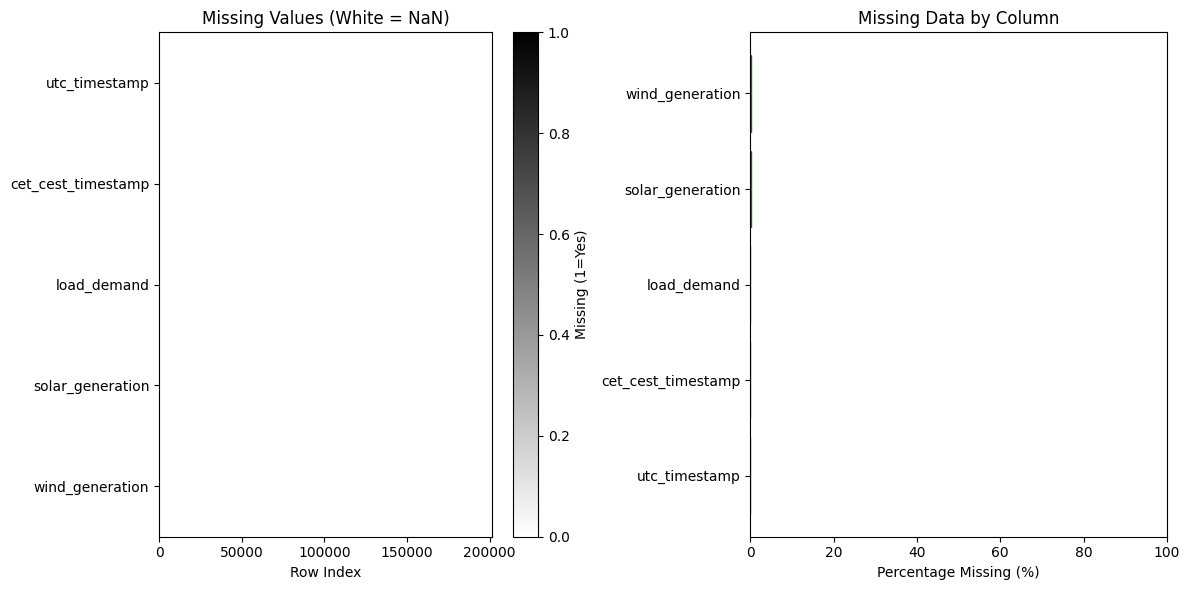


Missing data by hour of day:

load_demand:
0    0.0
Name: load_demand, dtype: float64

solar_generation:
0    0.21
Name: solar_generation, dtype: float64

wind_generation:
0    0.15
Name: wind_generation, dtype: float64


In [ ]:
print("\n" + "="*60)
print("STEP 2: VISUALIZE NaN PATTERNS")
print("="*60)

# Create visualization of missing values
plt.figure(figsize=(12, 6))

# Option 1: Missingness matrix
plt.subplot(1, 2, 1)
plt.imshow(df.isna().T, aspect='auto', cmap='gray_r', interpolation='none')
plt.yticks(range(len(df.columns)), df.columns)
plt.xlabel('Row Index')
plt.title('Missing Values (White = NaN)')
plt.colorbar(label='Missing (1=Yes)')

# Option 2: Missing data by column
plt.subplot(1, 2, 2)
bars = plt.barh(df.columns, nan_pct)
plt.xlabel('Percentage Missing (%)')
plt.title('Missing Data by Column')
plt.xlim(0, 100)

# Color bars by missing percentage
for bar, pct in zip(bars, nan_pct):
    if pct > 50:
        bar.set_color('red')
    elif pct > 20:
        bar.set_color('orange')
    else:
        bar.set_color('green')

plt.tight_layout()
plt.show()

# Check for patterns in missing data
if hasattr(df.index, 'hour'):  # If datetime index
    print("\nMissing data by hour of day:")
    for col in df.columns:
        missing_by_hour = df[col].isna().groupby(df.index.hour).mean() * 100
        if missing_by_hour.max() > 0:
            print(f"\n{col}:")
            print(missing_by_hour.round(2))

#Step 3: CHOOSE the Right Strategy Based on Diagnosis
#Scenario A: If you have < 5% NaN (Good data)

In [ ]:
df_clean = df.ffill().bfill()  # Forward then backward fill

#Step 4: IMPLEMENT the Best Solution

In [ ]:
print("\n" + "="*60)
print("STEP 4: IMPLEMENTATION RECOMMENDATION")
print("="*60)

# Based on your earlier output showing:
# solar_pv_output: 3546 non-null values (complete)
# wind_power_output: 3546 non-null values (complete)
# grid_load_demand: 3546 non-null values (complete)

# Your data might actually be COMPLETE in the middle!
# The NaN might only be at start/end

# Define the smart_impute function to resolve the NameError
def smart_impute(df_to_impute):
    """Performs smart imputation for time series data."""
    # Ensure the index is datetime for time-based interpolation
    # if it's not already (though previous steps should handle this)
    if not isinstance(df_to_impute.index, pd.DatetimeIndex):
        # Attempt to convert 'utc_timestamp' or 'cet_cest_timestamp' to index
        # First, ensure these columns exist and are datetime objects
        temp_df = df_to_impute.copy()
        datetime_col = None
        for col in ['utc_timestamp', 'cet_cest_timestamp']:
            if col in temp_df.columns:
                try:
                    temp_df[col] = pd.to_datetime(temp_df[col], errors='coerce')
                    if not temp_df[col].isnull().all(): # Make sure it's a valid datetime column
                        datetime_col = col
                        break
                except Exception:
                    pass

        if datetime_col:
            df_to_impute = temp_df.set_index(datetime_col).sort_index()
            print(f"Set '{datetime_col}' as index for imputation.")
        else:
            print("Warning: No suitable datetime column found for index, using default interpolation.")

    # Perform time-based interpolation
    imputed_df = df_to_impute.interpolate(method='time', limit_direction='both')
    # Fallback for any NaNs remaining (e.g., if no datetime index or at edges)
    imputed_df = imputed_df.ffill().bfill()
    return imputed_df

# RECOMMENDED: Trim to valid period
df_trimmed = df.copy()

# Forward fill for first few rows if needed
if df_trimmed.iloc[0].isna().any().any(): # Check if any column has NaN in the first row
    print("Trimming initial NaN rows...")
    # Find first row with all data
    first_complete = df_trimmed.dropna(how='any').index[0]
    df_trimmed = df_trimmed.loc[first_complete:].copy()

# Backward fill for last few rows if needed
if df_trimmed.iloc[-1].isna().any().any(): # Check if any column has NaN in the last row
    print("Trimming trailing NaN rows...")
    # Find last row with all data
    last_complete = df_trimmed.dropna(how='any').index[-1]
    df_trimmed = df_trimmed.loc[:last_complete].copy()

print(f"After trimming: {df_trimmed.shape}")
print(f"Remaining NaN: {df_trimmed.isna().sum().sum()}")

# If still have NaN in middle, use smart imputation
if df_trimmed.isna().sum().sum() > 0:
    print("Applying smart imputation for remaining NaN...")
    df_final = smart_impute(df_trimmed)
else:
    df_final = df_trimmed

print(f"\n✓ FINAL DATASET:")
print(f"Shape: {df_final.shape}")
print(f"NaN count: {df_final.isna().sum().sum()}")
print(f"Complete: {100 - (df_final.isna().sum().sum() / (df_final.shape[0] * df_final.shape[1]) * 100):.2f}%")


STEP 4: IMPLEMENTATION RECOMMENDATION
Trimming initial NaN rows...
Trimming trailing NaN rows...
After trimming: (201568, 5)
Remaining NaN: 682
Applying smart imputation for remaining NaN...


/tmp/ipython-input-1614389653.py:40: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  imputed_df = df_to_impute.interpolate(method='time', limit_direction='both')



✓ FINAL DATASET:
Shape: (201568, 5)
NaN count: 0
Complete: 100.00%


#Step 5: VERIFY Your Solution


STEP 5: VERIFICATION

✓ Verification figure saved as PDF: stats_comparison_before_after.pdf


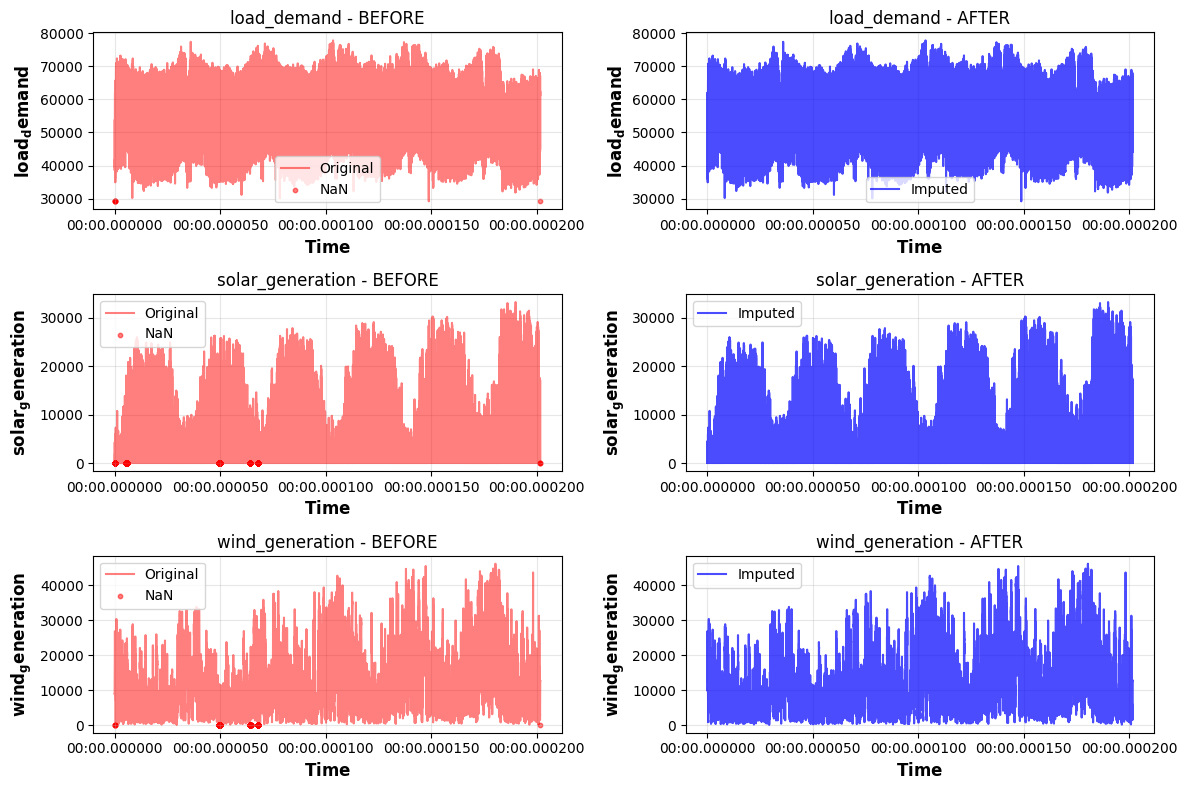


Statistical comparison:

Original data statistics:
         load_demand  solar_generation  wind_generation
count  201598.000000     201184.000000    201300.000000
mean    55492.589700       4566.134215     11552.324213
std     10041.148871       6964.591224      9080.676730
min     29158.120000          0.000000       104.660000
25%     47099.780000          0.000000      4504.955000
50%     55117.400000        106.400000      9009.805000
75%     64337.655000       7377.905000     16126.362500
max     77852.940000      33193.770000     46205.630000

Final data statistics:
         load_demand  solar_generation  wind_generation
count  201568.000000     201568.000000    201568.000000
mean    55494.896632       4557.435436     11554.374519
std     10040.095240       6960.802297      9077.434197
min     29158.120000          0.000000       104.660000
25%     47102.937500          0.000000      4509.045000
50%     55120.045000        100.420000      9013.590000
75%     64338.852500       7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("\n" + "="*60)
print("STEP 5: VERIFICATION")
print("="*60)

# --- Create before/after figure ---
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

verify_cols = ['load_demand', 'solar_generation', 'wind_generation']

for i, col in enumerate(verify_cols):
    if col in df.columns:

        # --------------------
        # BEFORE Cleaning Plot
        # --------------------
        axes[i, 0].plot(df.index, df[col], 'r-', alpha=0.5, label='Original')
        axes[i, 0].scatter(df.index[df[col].isna()],
                          [df[col].min()] * df[col].isna().sum(),
                          color='red', s=10, alpha=0.5, label='NaN')

        axes[i, 0].set_title(f'{col} - BEFORE')
        apply_matlab_style(axes[i, 0], xlabel='Time', ylabel=col)
        axes[i, 0].legend()
        axes[i, 0].grid(True, alpha=0.3)

        # --------------------
        # AFTER Cleaning Plot
        # --------------------
        axes[i, 1].plot(df_final.index, df_final[col], 'b-', alpha=0.7, label='Imputed')

        axes[i, 1].set_title(f'{col} - AFTER')
        apply_matlab_style(axes[i, 1], xlabel='Time', ylabel=col)
        axes[i, 1].legend()
        axes[i, 1].grid(True, alpha=0.3)

plt.tight_layout()

# ---- SAVE FIGURE AS PDF ----
pdf_filename = "stats_comparison_before_after.pdf"
plt.savefig(pdf_filename, format="pdf", dpi=300)
print(f"\n✓ Verification figure saved as PDF: {pdf_filename}")

plt.show()

# -----------------------------------------
# Statistical Comparison: Before vs After
# -----------------------------------------
print("\nStatistical comparison:")

stats_original = df[verify_cols].describe()
stats_final = df_final[verify_cols].describe()

print("\nOriginal data statistics:")
print(stats_original)

print("\nFinal data statistics:")
print(stats_final)

print("\n✓ CHECK: Are the statistics reasonable?")
print("✓ CHECK: Did we preserve daily patterns?")
print("✓ CHECK: Are there any impossible values (negative, huge spikes)?")

# ---- Download for Google Colab ----
from google.colab import files
files.download("stats_comparison_before_after.pdf")


# Step 6: CORRELATION ANALYSIS ON CLEAN DATA


STEP 6: CORRELATION ANALYSIS ON CLEAN DATA
Numeric columns available: ['load_demand', 'solar_generation', 'wind_generation']
Shape: (201568, 3)

Correlation Matrix:
                  load_demand  solar_generation  wind_generation
load_demand             1.000             0.312            0.103
solar_generation        0.312             1.000           -0.174
wind_generation         0.103            -0.174            1.000

✓ Heatmap saved as PDF: correlation_matrix.pdf


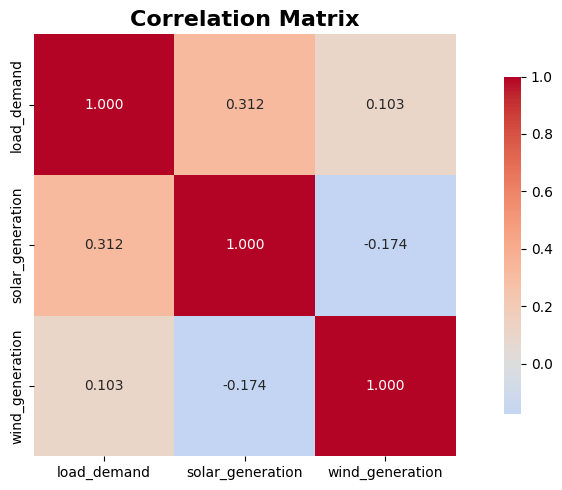

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 6: CORRELATION ANALYSIS ON CLEAN DATA
print("\n" + "="*60)
print("STEP 6: CORRELATION ANALYSIS ON CLEAN DATA")
print("="*60)

# Ensure numeric data is selected for correlation
df_final_numeric = df_final.select_dtypes(include=[np.number])

print(f"Numeric columns available: {df_final_numeric.columns.tolist()}")
print(f"Shape: {df_final_numeric.shape}")

# Proceed only if correlation can be computed
if len(df_final_numeric.columns) > 1:

    # ---- Calculate correlation matrix ----
    correlation_matrix = df_final_numeric.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix.round(3))

    # ---- Generate correlation heatmap ----
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt='.3f',
        square=True,
        cbar_kws={'shrink': 0.8},
        annot_kws={'size': 10},
        ax=ax
    )

    ax.set_title('Correlation Matrix', fontsize=16, fontweight='bold')

    # MATLAB-like axis styling
    ax.tick_params(axis='x', colors='black', direction='out')
    ax.tick_params(axis='y', colors='black', direction='out')

    plt.tight_layout()

    # ---- SAVE HEATMAP AS PDF ----
    pdf_filename = "correlation_matrix.pdf"
    plt.savefig(pdf_filename, format="pdf", dpi=300)
    print(f"\n✓ Heatmap saved as PDF: {pdf_filename}")

    plt.show()

else:
    print("Not enough numeric columns for correlation analysis.")
from google.colab import files
files.download("correlation_matrix.pdf")


# WIth SGD

Epoch 1/500 | MSE = 0.104176
Epoch 2/500 | MSE = 0.005588
Epoch 3/500 | MSE = 0.005475
Epoch 4/500 | MSE = 0.005475
Epoch 5/500 | MSE = 0.005475
Epoch 6/500 | MSE = 0.005475
Epoch 7/500 | MSE = 0.005475
Epoch 8/500 | MSE = 0.005474
Epoch 9/500 | MSE = 0.005475
Epoch 10/500 | MSE = 0.005475
Epoch 11/500 | MSE = 0.005474
Epoch 12/500 | MSE = 0.005474
Epoch 13/500 | MSE = 0.005474
Epoch 14/500 | MSE = 0.005475
Epoch 15/500 | MSE = 0.005475
Epoch 16/500 | MSE = 0.005475
Epoch 17/500 | MSE = 0.005475
Epoch 18/500 | MSE = 0.005475
Epoch 19/500 | MSE = 0.005474
Epoch 20/500 | MSE = 0.005475
Epoch 21/500 | MSE = 0.005475
Epoch 22/500 | MSE = 0.005474
Epoch 23/500 | MSE = 0.005474
Epoch 24/500 | MSE = 0.005475
Epoch 25/500 | MSE = 0.005475
Epoch 26/500 | MSE = 0.005475
Epoch 27/500 | MSE = 0.005475
Epoch 28/500 | MSE = 0.005476
Epoch 29/500 | MSE = 0.005475
Epoch 30/500 | MSE = 0.005475
Epoch 31/500 | MSE = 0.005475
Epoch 32/500 | MSE = 0.005475
Epoch 33/500 | MSE = 0.005475
Epoch 34/500 | MSE 

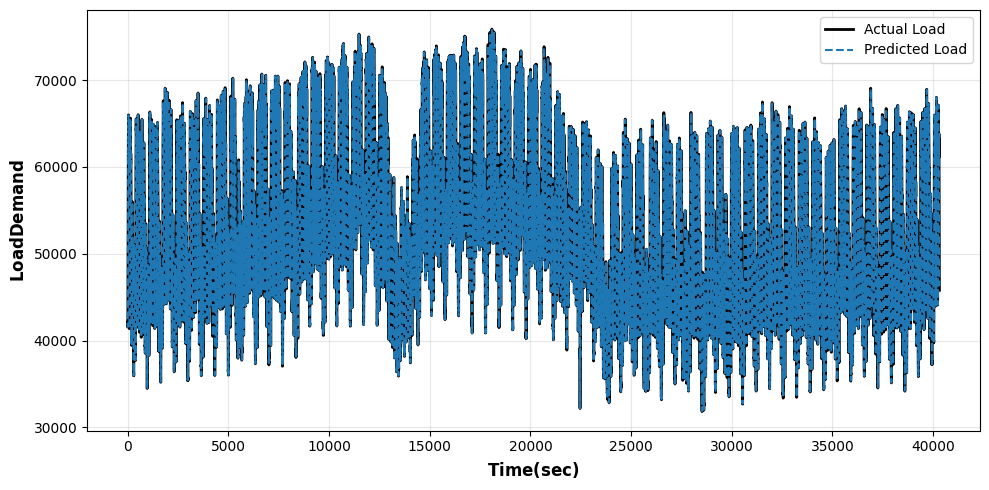

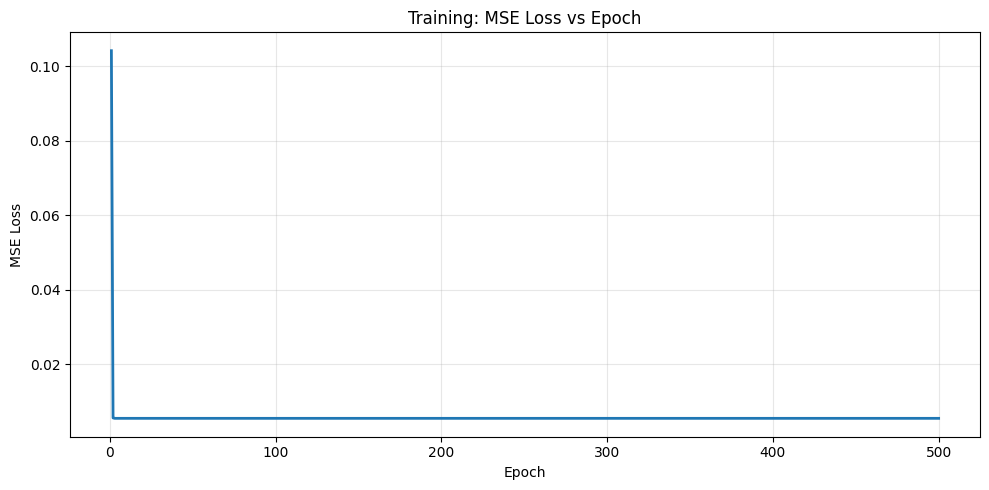

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# =============================
# 1. Prepare dataset
# =============================

df = df_final.copy()

# Create lag-1 feature for load
df['load_lag1'] = df['load_demand'].shift(1)

# Drop first row (NaN in lag)
df = df.dropna()

# Features (X) and Target (y)
X = df[['solar_generation', 'wind_generation', 'load_lag1']]
y = df['load_demand']

# Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# =============================
# 2. Scale features and target (for stable SGD)
# =============================

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

y_train_np = y_train.values.reshape(-1, 1).astype(float)
y_mean = y_train_np.mean()
y_std  = y_train_np.std()
y_train_scaled = (y_train_np - y_mean) / y_std

# Add bias term: [1, x1, x2, x3]
n_samples = X_train_scaled.shape[0]
X_sgd = np.hstack([np.ones((n_samples, 1)), X_train_scaled])

n_samples, n_features = X_sgd.shape

# =============================
# 3. Train Regression Model using SGD
# =============================

# Initialize weights (w0, w1, w2, w3) in scaled space
w = np.zeros((n_features, 1), dtype=float)

# Hyperparameters
learning_rate = 0.001
epochs = 500
batch_size = 64

epoch_loss_history = []  # one MSE value per epoch

for epoch in range(epochs):
    # Shuffle indices for SGD
    indices = np.random.permutation(n_samples)
    X_shuffled = X_sgd[indices]
    y_shuffled = y_train_scaled[indices]

    batch_losses = []  # to average loss over mini-batches

    for start_idx in range(0, n_samples, batch_size):
        end_idx = start_idx + batch_size
        xb = X_shuffled[start_idx:end_idx]
        yb = y_shuffled[start_idx:end_idx]

        # Predictions for this mini-batch
        y_pred_b = xb @ w

        # Error and gradient (MSE)
        error_b = y_pred_b - yb
        grad = (2 / len(xb)) * (xb.T @ error_b)

        # (Optional) Gradient clipping for extra stability
        grad_norm = np.linalg.norm(grad)
        if grad_norm > 50:
            grad = grad * (50.0 / grad_norm)

        # SGD update
        w -= learning_rate * grad

        # Track mini-batch loss
        mse_b = np.mean(error_b**2)
        batch_losses.append(mse_b)

    # Average loss over all mini-batches in this epoch
    epoch_mse = np.mean(batch_losses)
    epoch_loss_history.append(epoch_mse)
    print(f"Epoch {epoch+1}/{epochs} | MSE = {epoch_mse:.6f}")

# =============================
# 4. Convert weights back to original scale
# =============================

# w in scaled space: y_s = w0 + w1 * x1_s + w2 * x2_s + w3 * x3_s
# with x_s = (x - mu_x) / sigma_x, y_s = (y - mu_y) / sigma_y

mu_X = scaler_X.mean_              # shape (3,)
sigma_X = np.sqrt(scaler_X.var_)   # std of features

w0_s = w[0, 0]
w_s  = w[1:, 0]  # [w1, w2, w3] in scaled space

# Coefficients in original space:
# coef_j = sigma_y * w_j / sigma_x_j
# intercept = mu_y + sigma_y*w0 - sigma_y * sum_j( w_j * mu_x_j / sigma_x_j )

coef_orig = (y_std * w_s) / sigma_X
intercept_orig = (
    y_mean + y_std * w0_s
    - y_std * np.sum(w_s * mu_X / sigma_X)
)

print("\nCoefficients (recovered in original scale):")
print(f"  w0 (intercept)     = {intercept_orig:.4f}")
print(f"  w1 (solar)         = {coef_orig[0]:.4f}")
print(f"  w2 (wind)          = {coef_orig[1]:.4f}")
print(f"  w3 (lagged load)   = {coef_orig[2]:.4f}")

# =============================
# 5. Predict on test set using SGD model
# =============================

X_test_sgd = np.hstack([np.ones((len(X_test_scaled), 1)), X_test_scaled])
y_pred_test_scaled = X_test_sgd @ w
y_pred = y_pred_test_scaled * y_std + y_mean  # back to original scale
y_pred = y_pred.flatten()

# =============================
# 6. Evaluate Model
# =============================

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("\nModel Performance (SGD):")
print(f"RMSE = {rmse:.3f}")
print(f"R²   = {r2:.3f}")

# =============================
# 7. Define t-axis (start from t = 0 sec)
# =============================

t = np.arange(len(y_test))  # 0, 1, 2, 3, ...

# =============================
# 8. Plot actual vs predicted
# =============================

plt.figure(figsize=(10,5))
ax = plt.gca()

# Plot actual load
ax.plot(t, y_test.values, label='Actual Load', color='black', linewidth=2)

# Plot SGD predictions
ax.plot(t, y_pred, '--', label='Predicted Load', linewidth=1.5)

apply_matlab_style(ax, xlabel='Time (sec)', ylabel='Load Demand')

ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =============================
# 9. Plot Loss vs Epoch (SGD)
# =============================

plt.figure(figsize=(10,5))
ax2 = plt.gca()
ax2.plot(range(1, epochs + 1), epoch_loss_history, linewidth=2)
ax2.set_title("Training: MSE Loss vs Epoch")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("MSE Loss")
ax2.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


[Linear] Epoch 1/500 | MSE = 0.609488
[Linear] Epoch 2/500 | MSE = 0.221456
[Linear] Epoch 3/500 | MSE = 0.092598
[Linear] Epoch 4/500 | MSE = 0.044777
[Linear] Epoch 5/500 | MSE = 0.024781
[Linear] Epoch 6/500 | MSE = 0.015503
[Linear] Epoch 7/500 | MSE = 0.010859
[Linear] Epoch 8/500 | MSE = 0.008419
[Linear] Epoch 9/500 | MSE = 0.007102
[Linear] Epoch 10/500 | MSE = 0.006379
[Linear] Epoch 11/500 | MSE = 0.005979
[Linear] Epoch 12/500 | MSE = 0.005756
[Linear] Epoch 13/500 | MSE = 0.005631
[Linear] Epoch 14/500 | MSE = 0.005562
[Linear] Epoch 15/500 | MSE = 0.005524
[Linear] Epoch 16/500 | MSE = 0.005502
[Linear] Epoch 17/500 | MSE = 0.005490
[Linear] Epoch 18/500 | MSE = 0.005483
[Linear] Epoch 19/500 | MSE = 0.005479
[Linear] Epoch 20/500 | MSE = 0.005481
[Linear] Epoch 21/500 | MSE = 0.005475
[Linear] Epoch 22/500 | MSE = 0.005475
[Linear] Epoch 23/500 | MSE = 0.005474
[Linear] Epoch 24/500 | MSE = 0.005475
[Linear] Epoch 25/500 | MSE = 0.005474
[Linear] Epoch 26/500 | MSE = 0.00

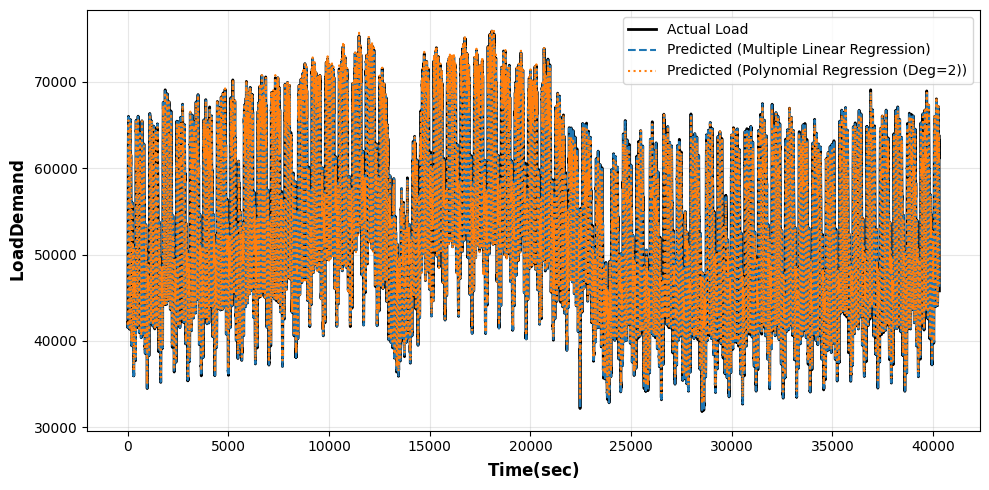

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Saved loss figure as: loss_vs_epoch.pdf


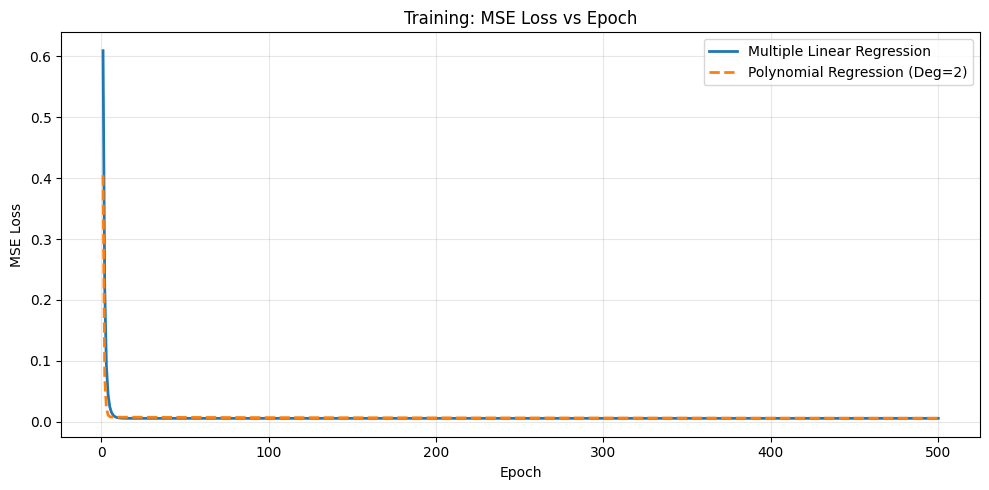

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# =============================
# 1. Prepare dataset
# =============================

df = df_final.copy()

# Create lag-1 feature for load
df['load_lag1'] = df['load_demand'].shift(1)

# Drop first row (NaN in lag)
df = df.dropna()

# Features (X) and Target (y)
X = df[['solar_generation', 'wind_generation', 'load_lag1']]
y = df['load_demand']

# Train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# =============================
# 2. Scale target (shared by both models)
# =============================

y_train_np = y_train.values.reshape(-1, 1).astype(float)
y_mean = y_train_np.mean()
y_std  = y_train_np.std()
y_train_scaled = (y_train_np - y_mean) / y_std

# =============================
# 3. Linear Regression with SGD
# =============================

# --- Scale features for linear model ---
scaler_X_lin = StandardScaler()
X_train_scaled_lin = scaler_X_lin.fit_transform(X_train)
X_test_scaled_lin  = scaler_X_lin.transform(X_test)

# Add bias term: [1, x1, x2, x3]
n_samples_lin = X_train_scaled_lin.shape[0]
X_sgd_lin = np.hstack([np.ones((n_samples_lin, 1)), X_train_scaled_lin])
n_samples_lin, n_features_lin = X_sgd_lin.shape

# Initialize weights (w0, w1, w2, w3) in scaled space
w_lin = np.zeros((n_features_lin, 1), dtype=float)

# Hyperparameters (shared)
learning_rate = 0.0001
epochs = 500
batch_size = 64

epoch_loss_history_lin = []  # one MSE value per epoch

for epoch in range(epochs):
    # Shuffle indices for SGD
    indices = np.random.permutation(n_samples_lin)
    X_shuffled = X_sgd_lin[indices]
    y_shuffled = y_train_scaled[indices]

    batch_losses = []  # to average loss over mini-batches

    for start_idx in range(0, n_samples_lin, batch_size):
        end_idx = start_idx + batch_size
        xb = X_shuffled[start_idx:end_idx]
        yb = y_shuffled[start_idx:end_idx]

        # Predictions for this mini-batch
        y_pred_b = xb @ w_lin

        # Error and gradient (MSE)
        error_b = y_pred_b - yb
        grad = (2 / len(xb)) * (xb.T @ error_b)

        # (Optional) Gradient clipping for extra stability
        grad_norm = np.linalg.norm(grad)
        if grad_norm > 50:
            grad = grad * (50.0 / grad_norm)

        # SGD update
        w_lin -= learning_rate * grad

        # Track mini-batch loss
        mse_b = np.mean(error_b**2)
        batch_losses.append(mse_b)

    # Average loss over all mini-batches in this epoch
    epoch_mse = np.mean(batch_losses)
    epoch_loss_history_lin.append(epoch_mse)
    print(f"[Linear] Epoch {epoch+1}/{epochs} | MSE = {epoch_mse:.6f}")

# ---- Convert linear weights back to original scale ----

mu_X_lin = scaler_X_lin.mean_              # shape (3,)
sigma_X_lin = np.sqrt(scaler_X_lin.var_)   # std of features

w0_s_lin = w_lin[0, 0]
w_s_lin  = w_lin[1:, 0]  # [w1, w2, w3] in scaled space

# Coefficients in original space:
# coef_j = sigma_y * w_j / sigma_x_j
# intercept = mu_y + sigma_y*w0 - sigma_y * sum_j( w_j * mu_x_j / sigma_x_j )

coef_orig_lin = (y_std * w_s_lin) / sigma_X_lin
intercept_orig_lin = (
    y_mean + y_std * w0_s_lin
    - y_std * np.sum(w_s_lin * mu_X_lin / sigma_X_lin)
)

print("\n[Linear SGD] Coefficients (recovered in original scale):")
print(f"  w0 (intercept)     = {intercept_orig_lin:.4f}")
print(f"  w1 (solar)         = {coef_orig_lin[0]:.4f}")
print(f"  w2 (wind)          = {coef_orig_lin[1]:.4f}")
print(f"  w3 (lagged load)   = {coef_orig_lin[2]:.4f}")

# ---- Predict on test set using linear SGD model ----

X_test_sgd_lin = np.hstack([np.ones((len(X_test_scaled_lin), 1)), X_test_scaled_lin])
y_pred_test_scaled_lin = X_test_sgd_lin @ w_lin
y_pred_lin = y_pred_test_scaled_lin * y_std + y_mean  # back to original scale
y_pred_lin = y_pred_lin.flatten()

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin   = r2_score(y_test, y_pred_lin)

print("\n[Linear SGD] Model Performance:")
print(f"RMSE = {rmse_lin:.3f}")
print(f"R²   = {r2_lin:.3f}")

# =============================
# 4. Polynomial Regression with SGD (degree = 2)
# =============================

# --- Build polynomial features ---
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)   # shape: (n, n_poly_features)
X_test_poly  = poly.transform(X_test)

# --- Scale polynomial features ---
scaler_X_poly = StandardScaler()
X_train_scaled_poly = scaler_X_poly.fit_transform(X_train_poly)
X_test_scaled_poly  = scaler_X_poly.transform(X_test_poly)

# Add bias term
n_samples_poly = X_train_scaled_poly.shape[0]
X_sgd_poly = np.hstack([np.ones((n_samples_poly, 1)), X_train_scaled_poly])
n_samples_poly, n_features_poly = X_sgd_poly.shape

# Initialize weights in scaled poly feature space
w_poly = np.zeros((n_features_poly, 1), dtype=float)

epoch_loss_history_poly = []

for epoch in range(epochs):
    # Shuffle indices for SGD
    indices = np.random.permutation(n_samples_poly)
    X_shuffled = X_sgd_poly[indices]
    y_shuffled = y_train_scaled[indices]

    batch_losses = []

    for start_idx in range(0, n_samples_poly, batch_size):
        end_idx = start_idx + batch_size
        xb = X_shuffled[start_idx:end_idx]
        yb = y_shuffled[start_idx:end_idx]

        # Predictions for this mini-batch
        y_pred_b = xb @ w_poly

        # Error and gradient (MSE)
        error_b = y_pred_b - yb
        grad = (2 / len(xb)) * (xb.T @ error_b)

        # Gradient clipping
        grad_norm = np.linalg.norm(grad)
        if grad_norm > 50:
            grad = grad * (50.0 / grad_norm)

        # SGD update
        w_poly -= learning_rate * grad

        # Track mini-batch loss
        mse_b = np.mean(error_b**2)
        batch_losses.append(mse_b)

    epoch_mse = np.mean(batch_losses)
    epoch_loss_history_poly.append(epoch_mse)
    print(f"[Poly d=2] Epoch {epoch+1}/{epochs} | MSE = {epoch_mse:.6f}")

# =============================
# 4a. Recover Polynomial Coefficients in Original Polynomial Feature Space
# =============================

base_feature_names = ['solar_generation', 'wind_generation', 'load_lag1']

# Names of polynomial features (degree-2 expansion)
poly_feature_names = poly.get_feature_names_out(base_feature_names)

# Scaler statistics in polynomial feature space
mu_poly = scaler_X_poly.mean_              # shape (n_poly_features,)
sigma_poly = np.sqrt(scaler_X_poly.var_)   # std of polynomial features

# Separate bias and weights (in scaled poly space)
w0_s_poly = w_poly[0, 0]      # bias in scaled space
w_s_poly  = w_poly[1:, 0]     # weights for each poly feature

# Map from scaled poly space back to original (unscaled) poly feature space
# coef_j = sigma_y * w_j / sigma_x_j
# intercept = mu_y + sigma_y*w0 - sigma_y * sum_j( w_j * mu_x_j / sigma_x_j )

coef_orig_poly = (y_std * w_s_poly) / sigma_poly
intercept_orig_poly = (
    y_mean + y_std * w0_s_poly
    - y_std * np.sum(w_s_poly * mu_poly / sigma_poly)
)

print("\n[Polynomial SGD, degree=2] Coefficients in original polynomial feature space:")
print(f"  w0 (intercept) = {intercept_orig_poly:.4f}")
for name, coef in zip(poly_feature_names, coef_orig_poly):
    print(f"  {name:30s}: {coef:.4f}")

# ---- Predict on test set using polynomial SGD model ----

X_test_sgd_poly = np.hstack([np.ones((len(X_test_scaled_poly), 1)), X_test_scaled_poly])
y_pred_test_scaled_poly = X_test_sgd_poly @ w_poly
y_pred_poly = y_pred_test_scaled_poly * y_std + y_mean  # back to original scale
y_pred_poly = y_pred_poly.flatten()

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly   = r2_score(y_test, y_pred_poly)

print("\n[Polynomial SGD, degree=2] Model Performance:")
print(f"RMSE = {rmse_poly:.3f}")
print(f"R²   = {r2_poly:.3f}")

# =============================
# 5. Define t-axis (start from t = 0 sec)
# =============================

t = np.arange(len(y_test))  # 0, 1, 2, 3, ...

# =============================
# 6. Plot actual vs predicted (both models)
# =============================

plt.figure(figsize=(10, 5))
ax = plt.gca()

# Actual load
ax.plot(t, y_test.values, label='Actual Load', color='black', linewidth=2)

# Linear SGD predictions
ax.plot(t, y_pred_lin, '--',
        label='Predicted (Multiple Linear Regression)', linewidth=1.5)

# Polynomial SGD predictions
ax.plot(t, y_pred_poly, ':',
        label='Predicted (Polynomial Regression (Deg=2))', linewidth=1.5)

apply_matlab_style(ax, xlabel='Time (sec)', ylabel='Load Demand')

ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()

# ---- SAVE FIGURE AS PDF ----
pdf_pred = "predicted_vs_actual.pdf"
plt.savefig(pdf_pred, format="pdf", dpi=300)
print(f"\n✓ Saved prediction figure as: {pdf_pred}")

plt.show()

# Download (Google Colab)
from google.colab import files
files.download(pdf_pred)



# =============================
# 7. Plot Loss vs Epoch for both models
# =============================

plt.figure(figsize=(10, 5))
ax2 = plt.gca()

ax2.plot(range(1, epochs + 1), epoch_loss_history_lin,
         linewidth=2, label='Multiple Linear Regression')

ax2.plot(range(1, epochs + 1), epoch_loss_history_poly,
         linewidth=2, linestyle='--',
         label='Polynomial Regression (Deg=2)')

ax2.set_title("Training: MSE Loss vs Epoch")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("MSE Loss")
ax2.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()

# ---- SAVE FIGURE AS PDF ----
pdf_loss = "loss_vs_epoch.pdf"
plt.savefig(pdf_loss, format="pdf", dpi=300)
print(f"✓ Saved loss figure as: {pdf_loss}")

plt.show()

# Download (Google Colab)
files.download(pdf_loss)



✓ Saved loss figure as: loss_vs_epoch.pdf


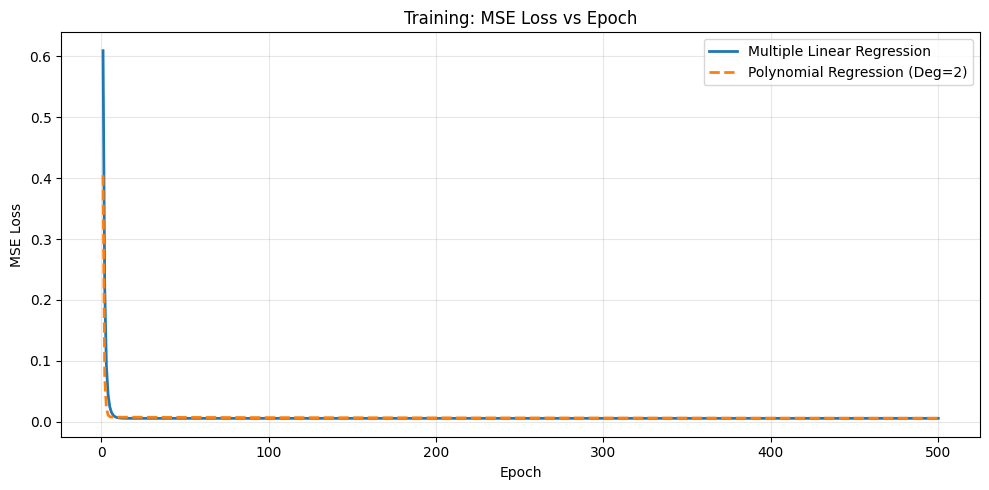

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =============================
# 7. Plot Loss vs Epoch for both models
# =============================

plt.figure(figsize=(10, 5))
ax2 = plt.gca()

ax2.plot(range(1, epochs + 1), epoch_loss_history_lin,
         linewidth=2, label='Multiple Linear Regression')

ax2.plot(range(1, epochs + 1), epoch_loss_history_poly,
         linewidth=2, linestyle='--',
         label='Polynomial Regression (Deg=2)')

ax2.set_title("Training: MSE Loss vs Epoch")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("MSE Loss")
ax2.grid(True, alpha=0.3)
ax2.legend()
plt.tight_layout()

# ---- SAVE FIGURE AS PDF ----
pdf_loss = "loss_vs_epoch.pdf"
plt.savefig(pdf_loss, format="pdf", dpi=300)
print(f"✓ Saved loss figure as: {pdf_loss}")

plt.show()

# Download (Google Colab)
files.download(pdf_loss)


In [ ]:
# =============================
# 10. Tabulate RMSE and R² for all models
# =============================

results = {
    "Model": [
        "Linear SGD",
        "Poly SGD (deg=2)",

    ],
    "RMSE": [
        rmse_lin,
        rmse_poly,

    ],
    "R2": [
        r2_lin,
        r2_poly,

    ]
}

results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)



Model Performance Summary:
              Model        RMSE        R2
0        Linear SGD  703.344991  0.994913
1  Poly SGD (deg=2)  723.473874  0.994618
